In [1]:
# Data Preprocessing

In [2]:
# Data Cleaning / Cleasing
  # Noisy Data
  # Missing Data Analysis
  # Outlier Analysis

# Data Standardization, Feature Scaling
  # 0-1 Transformation (Normalization)
  # z-scoring Transformation (Standardization)
  # Logarithmic Transformation (Log Transformation)
    
# Data Reduction
  # The number of Observation reduction
  # The number of Variable reduction

# Variable Transformation
  # Canstant variable
  # Categorical variable

In [3]:
# Outlier Analysis

import seaborn as sns

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df["table"]

In [7]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

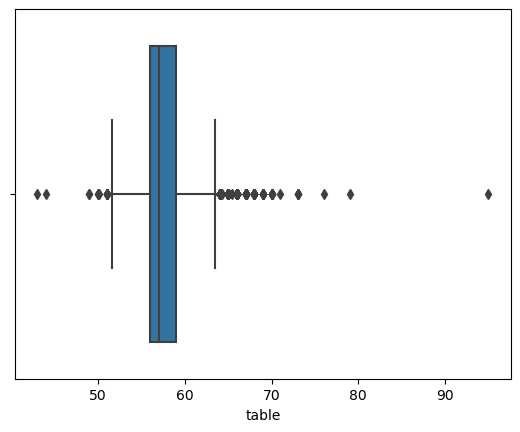

In [8]:
sns.boxplot(x=df_table)

In [10]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

IQR = Q3 - Q1    # (Interquantile)

In [11]:
Q1

56.0

In [12]:
Q3

59.0

In [13]:
IQR

3.0

In [15]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [16]:
lower_bound

51.5

In [17]:
upper_bound

63.5

In [21]:
(df_table < lower_bound) | (df_table > upper_bound)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [22]:
outlier_tf = (df_table < lower_bound)
outlier_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [24]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
df_table[outlier_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [26]:
import pandas as pd

In [27]:
type(df_table)

pandas.core.series.Series

In [28]:
df_table = pd.DataFrame(df_table)

In [29]:
df_table.shape

(53940, 1)

In [33]:
df_t = df_table[~((df_table < lower_bound) | (df_table > upper_bound)).any(axis = 1)]

In [39]:
# Fill with mean

In [35]:
# Suppression Method

In [41]:
# Multivariate Outlier observation analysis
  # Local Outlier Factor

import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [43]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [44]:
lof.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [45]:
df_scores = lof.negative_outlier_factor_

In [51]:
df_scores[:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [52]:
np.sort(df_scores)[:30]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736])

In [55]:
threshold_val = np.sort(df_scores)[15]

In [56]:
outlier_df = df_scores > threshold_val

In [57]:
outlier_df

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
new_df = df[df_scores > threshold_val]   # Delete according to threshold_val

In [63]:
new_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [65]:
# Suppression Method


In [66]:
df[df_scores == threshold_val]

,carat,depth,table,price,x,y,z
35753,0.46,63.4,68.0,911,4.88,4.8,3.07


In [67]:
supp_val = df[df_scores == threshold_val]

In [68]:
outliers = df[~outlier_df]

In [69]:
outliers

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
35753,0.46,63.4,68.0,911,4.88,4.80,3.07
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42


In [71]:
res = outliers.to_records(index=False)

In [72]:
res[:] = supp_val.to_records(index=False)

In [73]:
res

rec.array([(0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [74]:
df[~outlier_df]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
35753,0.46,63.4,68.0,911,4.88,4.80,3.07
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42


In [75]:
df[outlier_df] = pd.DataFrame(res, index = df[~outlier_df].index)

In [76]:
df[~outlier_df]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032.0,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778.0,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210.0,8.09,58.90,8.06
31230,0.45,68.6,57.0,756.0,4.73,4.50,3.19
35633,0.29,62.8,44.0,474.0,4.20,4.24,2.65
35753,0.46,63.4,68.0,911.0,4.88,4.80,3.07
36503,0.30,51.0,67.0,945.0,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012.0,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049.0,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262.0,5.72,5.59,4.42
